<a href="https://colab.research.google.com/github/ramachaitanya0/Score-Predictor/blob/master/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
from google.colab import files
uploaded = files.upload()

Saving airp.csv to airp.csv


In [8]:
import io
apd = pd.read_csv(io.BytesIO(uploaded['airp.csv']))

In [9]:
apd.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
apd.columns


Index(['Month', '#Passengers'], dtype='object')

In [12]:
apd['Month'] = pd.to_datetime(apd['Month'],format = "%Y-%m")

In [13]:
apd.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [18]:
apd.index = apd["Month"]

In [19]:
apd.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [20]:
apd = apd["#Passengers"]

Text(0.5, 0, 'time')

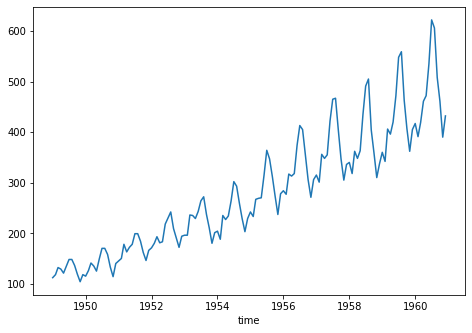

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(apd)
ax.set_xlabel("time")

In [37]:
rol_mean = apd.rolling(12).mean()

In [40]:
rol_std = apd.rolling(12).std()

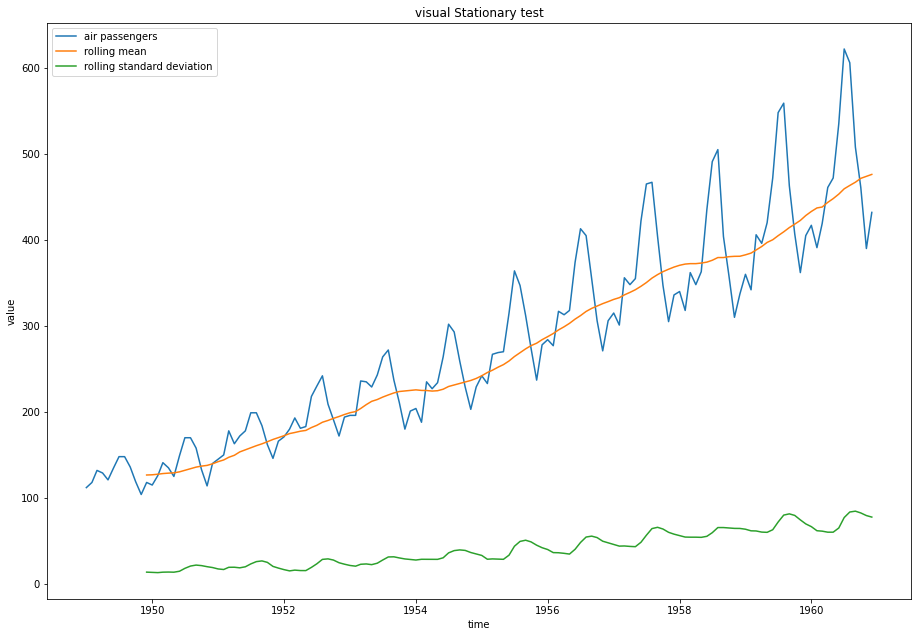

In [45]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(apd,label = "air passengers")
ax.plot(rol_mean,label = "rolling mean")
ax.plot(rol_std, label = "rolling standard deviation")
ax.set_xlabel("time")
ax.set_ylabel("value")
ax.set_title("visual Stationary test")
ax.legend(loc = "best")
plt.show()

In [47]:
from statsmodels.tsa.stattools import adfuller
test_res = adfuller(apd)

In [48]:
test_res

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)